In [1]:
# Librerías para trabajar dataframes y gráficas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Hotel Booking Dataset – Descripción de los features originales

| Feature                        | Descripción                                                          |
| ------------------------------ | -------------------------------------------------------------------- |
| hotel                          | Tipo de hotel: H1 = Resort Hotel, H2 = City Hotel                    |
| is_canceled                    | Indica si la reserva fue cancelada (1=sí, 0=no)                      |
| lead_time                      | Días entre la reserva y la fecha de llegada                          |
| arrival_date_year              | Año de llegada                                                       |
| arrival_date_month             | Mes de llegada (como texto)                                          |
| arrival_date_week_number       | Número de semana de la fecha de llegada                              |
| arrival_date_day_of_month      | Día del mes de llegada                                               |
| stays_in_weekend_nights        | Noches de fin de semana (sábado–domingo) reservadas o alojadas       |
| stays_in_week_nights           | Noches entre semana (lunes–viernes) reservadas o alojadas            |
| adults                         | Número de adultos                                                    |
| children                       | Número de niños                                                      |
| babies                         | Número de bebés                                                      |
| meal                           | Tipo de comida (SC, BB, HB, FB)                                      |
| country                        | País de origen (código ISO 3155–3)                                   |
| market_segment                 | Segmento de mercado (TA = Agencias de Viaje, TO = Tour Operadores)   |
| distribution_channel           | Canal de distribución (TA = Agencias de Viaje, TO = Tour Operadores) |
| is_repeated_guest              | Indica si el huésped es recurrente (1=sí, 0=no)                      |
| previous_cancellations         | Número de cancelaciones previas                                      |
| previous_bookings_not_canceled | Número de reservas previas no canceladas                             |
| reserved_room_type             | Código de habitación reservada (anonimizado)                         |
| assigned_room_type             | Código de habitación asignada (puede diferir de la reservada)        |
| booking_changes                | Número de cambios realizados en la reserva                           |
| deposit_type                   | Tipo de depósito (No Deposit, Non Refund, Refundable)                |
| agent                          | ID de la agencia de viajes                                           |
| company                        | ID de la empresa o entidad responsable de la reserva                 |
| days_in_waiting_list           | Días que la reserva estuvo en lista de espera                        |
| customer_type                  | Tipo de cliente (Contract, Group, Transient, Transient-party)        |
| adr                            | Tarifa diaria promedio (Average Daily Rate)                          |
| required_car_parking_spaces    | Espacios de estacionamiento requeridos                               |
| total_of_special_requests      | Número total de solicitudes especiales                               |
| reservation_status             | Estado final de la reserva (Canceled, Check-Out, No-Show)            |
| reservation_status_date        | Fecha de la última actualización del estado de la reserva            |


In [2]:
# Importar el csv
df = pd.read_csv('hotel_bookings.csv')

## Análisis Exploratorio (EDA) y pre-procesamiento de los datos

In [3]:
# Observamos el tipo de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Observamos la estructura del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Valores nulos
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# Borra las instancias donde children sea Nan
df.dropna(subset=['children'], inplace=True)

# Borra las instancias donde country es NA
df.dropna(subset=['country'], inplace=True)

In [7]:
# Mostramos la estructura de los features relacionados a la fecha
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,July,1
1,2015,July,1
2,2015,July,1
3,2015,July,1
4,2015,July,1


In [8]:
# Juntamos las columnas y reducimos la dimensionalidad para tener solo una columna de fecha
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

# Organizamos la nueva columna para dejarla como estaban las columnas relacionadas a la fecha
cols = list(df.columns)
cols.insert(3, cols.pop(cols.index('arrival_date')))
df = df.loc[:, cols]

# Borramos las columnas de fecha originales
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

In [9]:
# Cambia el tipo de arrival_date a date time
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Cambia el tipo de is_canceled a booleano
df['is_canceled'] = df['is_canceled'].astype(bool)
df['is_repeated_guest'] = df['is_repeated_guest'].astype(bool)

# Cambia el tipo de children a int
df['children'] = df['children'].astype(int)

In [10]:
# Columnas como agent y company suelen trabajarse con ID
df[['agent', 'company']].dropna(subset=['agent', 'company']).head(20)

,agent,company
2392,240.0,113.0
2697,185.0,281.0
2867,334.0,281.0
2877,328.0,281.0
2878,326.0,281.0
2879,326.0,281.0
2880,334.0,281.0
2881,328.0,281.0
2882,326.0,281.0
2883,334.0,281.0


Para nuestro objetivo de optimización de ingresos, al contemplar los features que teníamos disponibles, decidimos de primeras eliminar algunas columnas que pueden presentar una fuga de datos para el dataset a la hora de entrenar este modelo, en el sentido de que son datos que al momento de hacer predicciones no deberían estar disponibles. En el caso de agent y company, estas features creemos que no ofrecen un valor a la predicción de la variable objetivo debido a la alta cardinalidad que presentan y a que por su naturaleza de trabajarse por ID no muestran información sobre comportamiento o sobre el ADR como tal. Se eliminaron estas columnas

In [11]:
# Eliminamos algunas columnas que consideramos no eran útiles para nuestro análisis y entrenamiento
df.drop(["is_canceled",'booking_changes', 'reservation_status', 'reservation_status_date', 'required_car_parking_spaces', 'total_of_special_requests', "assigned_room_type", "agent", "company"], axis=1, inplace=True)

In [12]:
# Verificamos que el tipo de datos sea correcto y no haya valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   lead_time                       118898 non-null  int64         
 2   arrival_date                    118898 non-null  datetime64[ns]
 3   arrival_date_week_number        118898 non-null  int64         
 4   stays_in_weekend_nights         118898 non-null  int64         
 5   stays_in_week_nights            118898 non-null  int64         
 6   adults                          118898 non-null  int64         
 7   children                        118898 non-null  int64         
 8   babies                          118898 non-null  int64         
 9   meal                            118898 non-null  object        
 10  country                         118898 non-null  object      

In [13]:
df.isnull().sum()

hotel                             0
lead_time                         0
arrival_date                      0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
dtype: int64

In [14]:
df.head()

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
0,Resort Hotel,342,2015-07-01,27,0,0,2,0,0,BB,...,Direct,Direct,False,0,0,C,No Deposit,0,Transient,0.0
1,Resort Hotel,737,2015-07-01,27,0,0,2,0,0,BB,...,Direct,Direct,False,0,0,C,No Deposit,0,Transient,0.0
2,Resort Hotel,7,2015-07-01,27,0,1,1,0,0,BB,...,Direct,Direct,False,0,0,A,No Deposit,0,Transient,75.0
3,Resort Hotel,13,2015-07-01,27,0,1,1,0,0,BB,...,Corporate,Corporate,False,0,0,A,No Deposit,0,Transient,75.0
4,Resort Hotel,14,2015-07-01,27,0,2,2,0,0,BB,...,Online TA,TA/TO,False,0,0,A,No Deposit,0,Transient,98.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   lead_time                       118898 non-null  int64         
 2   arrival_date                    118898 non-null  datetime64[ns]
 3   arrival_date_week_number        118898 non-null  int64         
 4   stays_in_weekend_nights         118898 non-null  int64         
 5   stays_in_week_nights            118898 non-null  int64         
 6   adults                          118898 non-null  int64         
 7   children                        118898 non-null  int64         
 8   babies                          118898 non-null  int64         
 9   meal                            118898 non-null  object        
 10  country                         118898 non-null  object      

In [16]:
# Métricas estadísticas
df.describe(include='number').round(2)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr
count,118898.00,118898.00,118898.00,118898.0,118898.00,118898.0,118898.00,118898.00,118898.00,118898.00,118898.00
mean,104.31,27.17,0.93,2.5,1.86,0.1,0.01,0.09,0.13,2.33,102.00
std,106.90,13.59,1.00,1.9,0.58,0.4,0.10,0.85,1.48,17.63,50.49
min,0.00,1.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,-6.38
25%,18.00,16.00,0.00,1.0,2.00,0.0,0.00,0.00,0.00,0.00,70.00
50%,69.00,28.00,1.00,2.0,2.00,0.0,0.00,0.00,0.00,0.00,95.00
75%,161.00,38.00,2.00,3.0,2.00,0.0,0.00,0.00,0.00,0.00,126.00
max,737.00,53.00,16.00,41.0,55.00,10.0,10.00,26.00,72.00,391.00,5400.00


In [17]:
# One hot encoder para las variables categóricas (menos país)
dummy = df.drop(columns=['country'])

dummy=pd.get_dummies(dummy, dtype=int)
dummy.head()

,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,2015-07-01,27,0,0,2,0,0,False,0,...,0,0,0,1,0,0,0,0,1,0
1,737,2015-07-01,27,0,0,2,0,0,False,0,...,0,0,0,1,0,0,0,0,1,0
2,7,2015-07-01,27,0,1,1,0,0,False,0,...,0,0,0,1,0,0,0,0,1,0
3,13,2015-07-01,27,0,1,1,0,0,False,0,...,0,0,0,1,0,0,0,0,1,0
4,14,2015-07-01,27,0,2,2,0,0,False,0,...,0,0,0,1,0,0,0,0,1,0


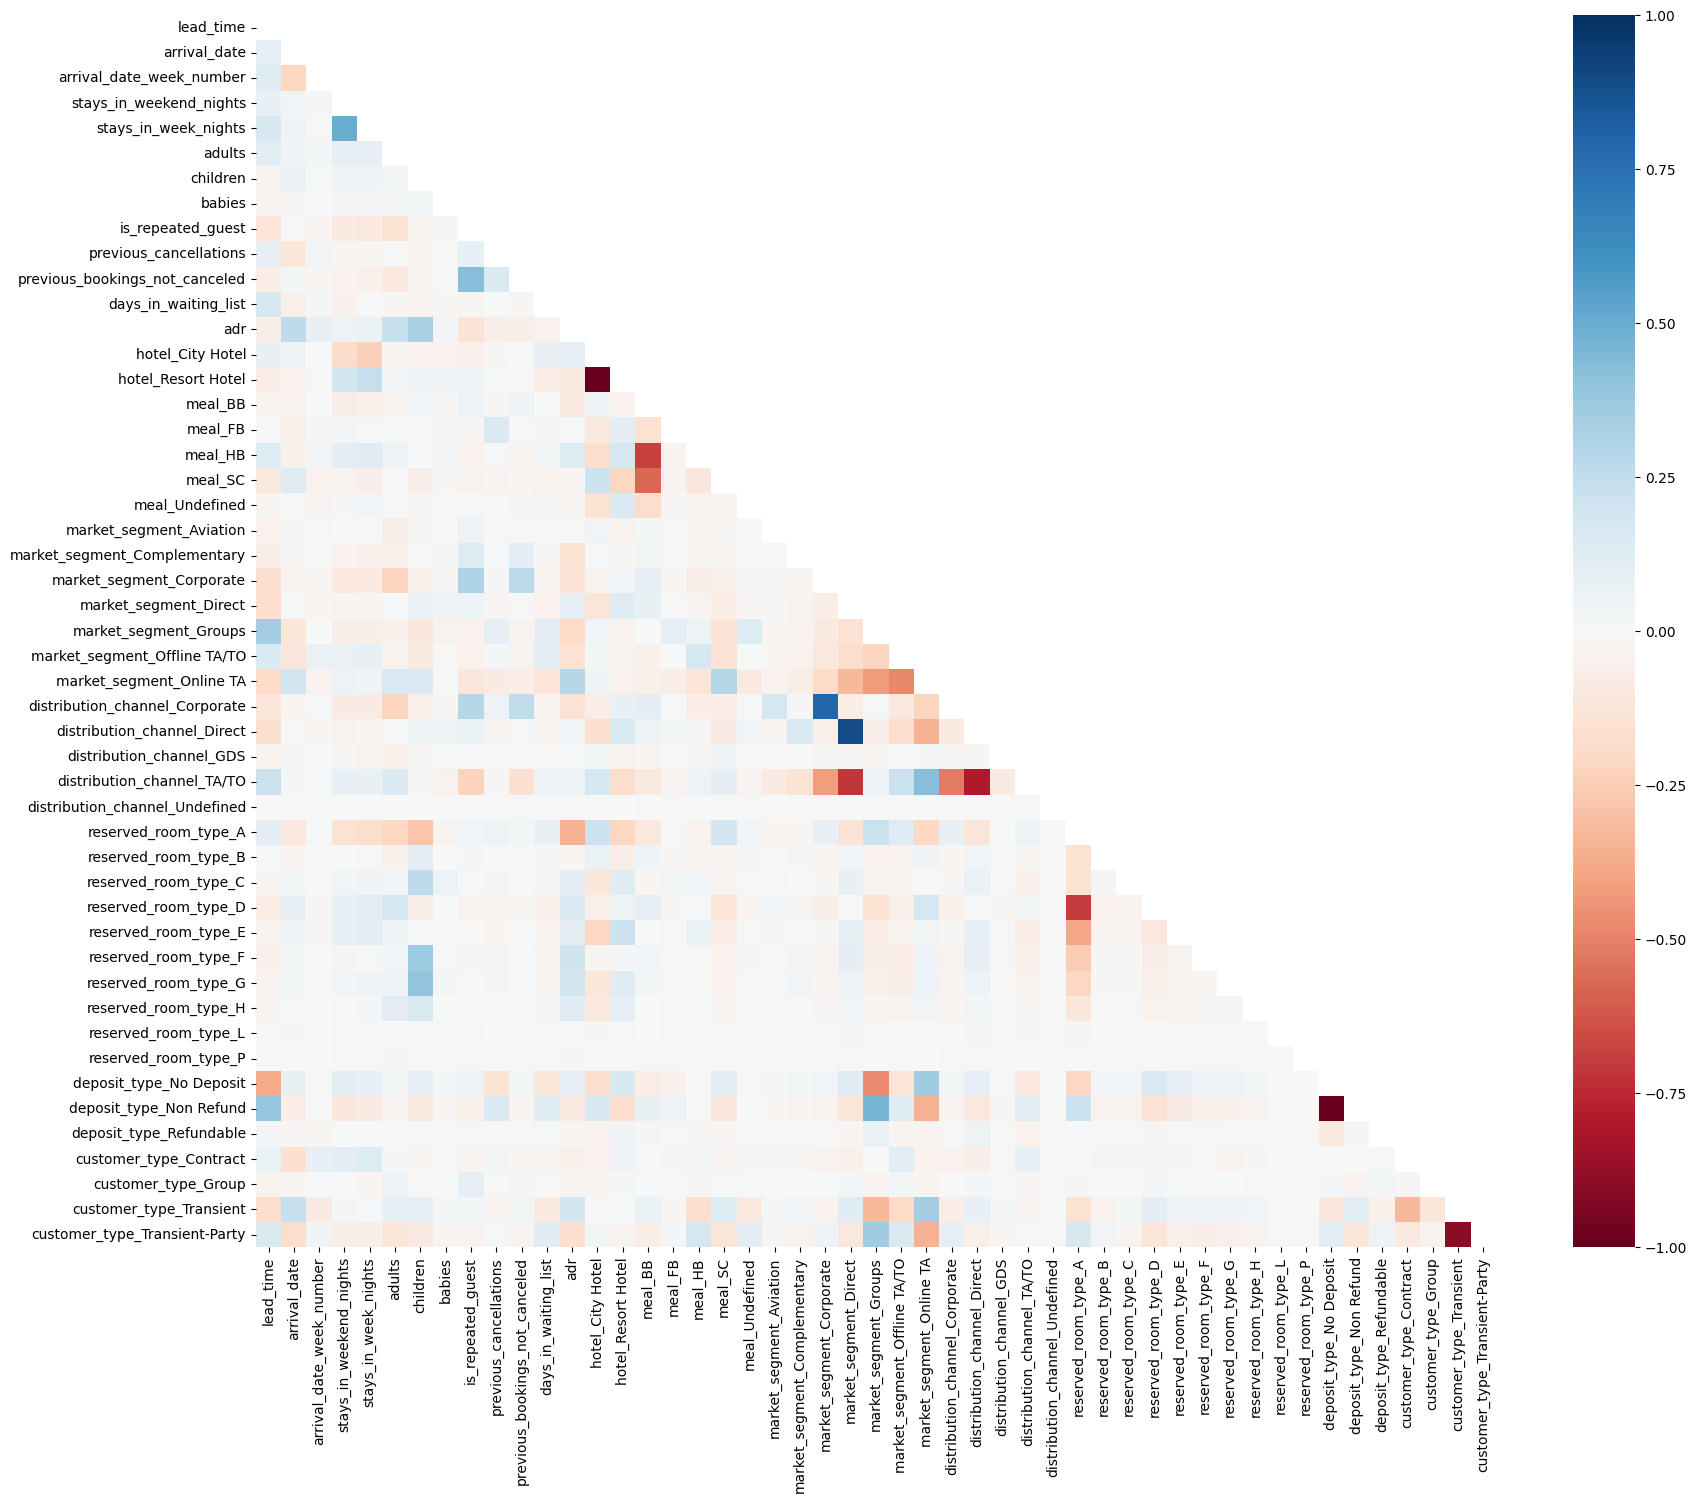

In [18]:
# Matriz de correlación
corr=dummy.corr()
fig, axs=plt.subplots(figsize=(20,16))
sns.heatmap(corr, annot=False, ax=axs, fmt=".2f", vmin="-1", vmax="1", mask=np.triu(corr), cmap="RdBu")
plt.grid(False)
plt.show()

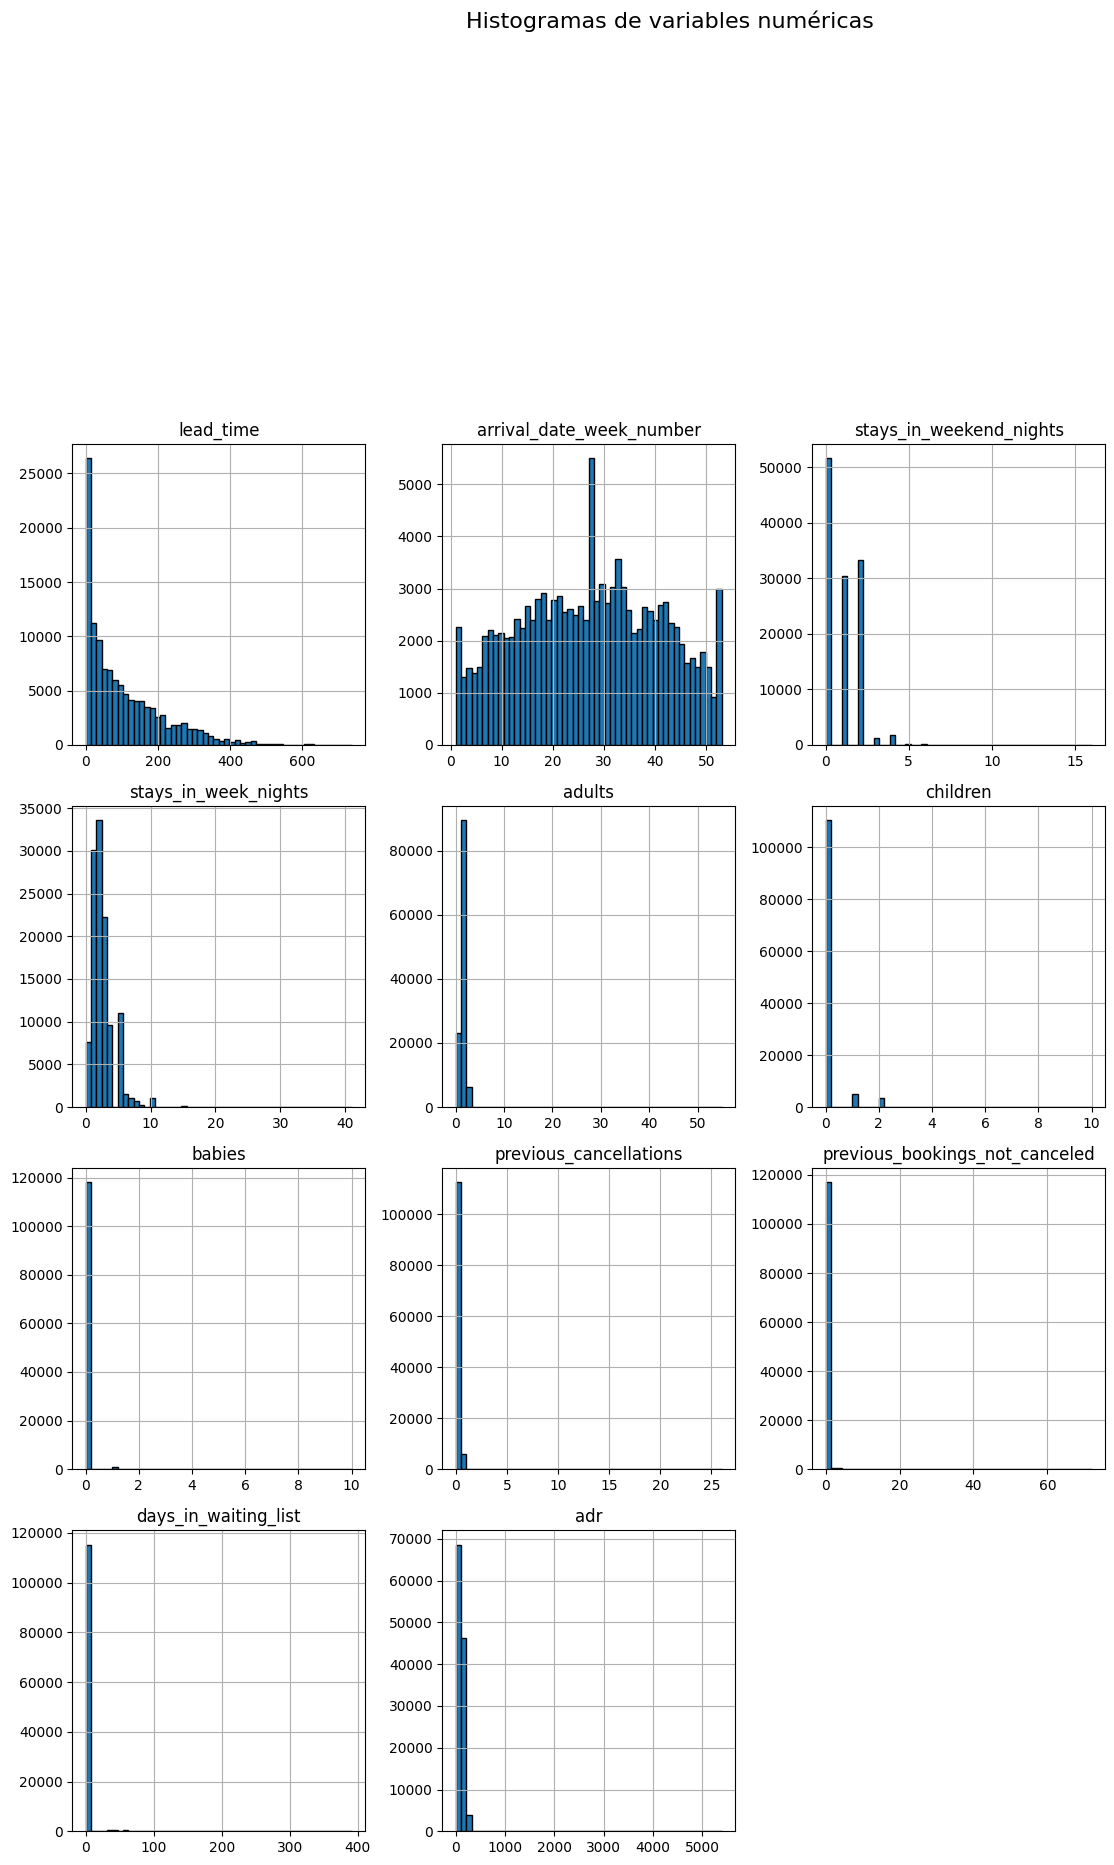

In [19]:
# Matriz de histogramas
col_numericas = df.select_dtypes(include=['int64', 'float64']).columns
df[col_numericas].hist(bins=50, figsize=(15, 20), edgecolor='black')
plt.suptitle("Histogramas de variables numéricas", fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.8, 0.8])
plt.show()

## Tratamiento de valores atípicos y anomalías

Durante el EDA se encontraron datos con valores atípicos y también anómalos.
Por ejemplo, al hacer gráficas de ADR (Tarifa diaria promedio), pudimos observar que el eje donde se graficaba este feature mostraba ticks de hasta 6000, por lo que nos resultaba extraño que aparecieran datos cerca de este número. Se hizo una consulta para verificar esto y obtuvimos que había una instancia con un valor de ADR de 5400, junto con algunos datos que únicamente llegaban a 500 de ADR. Con esto en mente, creemos que lo más probable es que existió un error al ingresar los datos y el valor real debería ser cercano a los 500 de ADR. De cualquier modo, decidimos borrar esta instancia.


In [20]:
# Consulta la instancia donde adr es mayor a 000
df[df['adr'] > 500]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
15083,Resort Hotel,1,2015-07-15,29,0,1,2,0,0,BB,...,Corporate,Corporate,True,0,1,A,No Deposit,0,Transient,508.0
48515,City Hotel,35,2016-03-25,13,0,1,2,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,Non Refund,0,Transient,5400.0
111403,City Hotel,0,2017-05-09,19,0,1,1,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,No Deposit,0,Transient,510.0


In [21]:
df[df['adr'] == 5400]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
48515,City Hotel,35,2016-03-25,13,0,1,2,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,Non Refund,0,Transient,5400.0


In [22]:
# Borra la instancia donde adr es 5400
df.drop(df[df['adr'] == 5400].index, inplace=True)

Al ejecutar la función describe() se observó que el valor máximo de lead_time era considerablemente alto en comparación con el promedio y el tercer cuartil. Para investigar esto, se realizó una consulta específica para identificar valores iguales o superiores a 500 días, y efectivamente se encontraron varias instancias, incluso algunas cercanas a 600 días. Debido a esto, concluimos que no es necesario eliminar estas observaciones, ya que parecen ser valores atípicos pero posibles dentro del comportamiento real de las reservas.

In [23]:
# Consulta la instancia donde lead time es mayor a 500
df[df['lead_time'] > 500]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
1,Resort Hotel,737,2015-07-01,27,0,0,2,0,0,BB,...,Direct,Direct,False,0,0,C,No Deposit,0,Transient,0.00
4182,Resort Hotel,709,2016-02-25,9,8,20,2,0,0,HB,...,Direct,Direct,False,0,0,E,No Deposit,0,Transient,68.00
8395,Resort Hotel,542,2016-09-26,40,2,5,2,0,0,HB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,69.71
8397,Resort Hotel,542,2016-09-26,40,2,5,2,0,0,HB,...,Groups,TA/TO,False,0,0,E,No Deposit,0,Transient-Party,87.00
8399,Resort Hotel,542,2016-09-26,40,2,5,2,0,0,HB,...,Groups,TA/TO,False,0,0,E,No Deposit,0,Transient-Party,87.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119100,City Hotel,518,2017-08-26,34,2,1,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,112.67
119102,City Hotel,518,2017-08-26,34,2,1,1,0,0,BB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,0.00
119107,City Hotel,518,2017-08-26,34,2,1,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,112.67
119109,City Hotel,518,2017-08-26,34,2,1,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,112.67


Para un segundo caso, ocurrió que existía un valor de ADR que era negativo, lo cual en la teoría es imposible debido a que el ADR es una métrica que se calcula dividiendo los ingresos totales por habitaciones entre el número de habitaciones vendidas (variables que nunca deberían ser negativas). Se procedió a borrar la instancia del dataset.

In [24]:
# Consulta para ADR menor a 0 (Negativo)
df[df['adr'] < 0]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
14969,Resort Hotel,195,2017-03-05,10,4,6,2,0,0,BB,...,Groups,Direct,True,0,2,A,No Deposit,0,Transient-Party,-6.38


In [25]:
# Borra las instancia de ADR negativa
df.drop(df[df['adr'] < 0].index, inplace=True)

Otro dato que llamó la atención fue el máximo de 55 personas (adultas) para una sola reservación, por lo que procedimos a hacer una rápida consulta de los datos para verificar que no fuera un valor ficticio. Al hacer la consulta, pudimos observar que existen algunas instancias donde la reservación se realizó para más de 20 personas (12 instancias que cumplen con esto), sin embargo, puede justificarse debido al customer_type que nos indica el tipo de reservación que se realizó para los clientes, en este caso la reservación fue grupal por lo que tiene sentido que haya ese número de huespedes en los datos.

In [26]:
# Consulta instancias para adultos mayor a 10
df[df['adults'] > 10]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
1539,Resort Hotel,304,2015-09-03,36,0,3,40,0,0,BB,...,Direct,Direct,False,0,0,A,No Deposit,0,Group,0.0
1587,Resort Hotel,333,2015-09-05,36,2,5,26,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,No Deposit,0,Group,0.0
1643,Resort Hotel,336,2015-09-07,37,1,2,50,0,0,BB,...,Direct,Direct,False,0,0,A,No Deposit,0,Group,0.0
1752,Resort Hotel,340,2015-09-12,37,2,5,26,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,No Deposit,0,Group,0.0
1884,Resort Hotel,347,2015-09-19,38,2,5,26,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,No Deposit,0,Group,0.0
1917,Resort Hotel,349,2015-09-21,39,1,3,27,0,0,HB,...,Direct,Direct,False,0,0,A,No Deposit,0,Group,0.0
1962,Resort Hotel,352,2015-09-24,39,1,3,27,0,0,HB,...,Direct,Direct,False,0,0,A,No Deposit,0,Group,0.0
2003,Resort Hotel,354,2015-09-26,39,2,5,26,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,No Deposit,0,Group,0.0
2164,Resort Hotel,361,2015-10-03,40,2,5,26,0,0,BB,...,Offline TA/TO,TA/TO,False,0,0,A,No Deposit,0,Group,0.0
2173,Resort Hotel,338,2015-10-04,41,2,0,55,0,0,HB,...,Direct,Direct,False,0,0,A,No Deposit,0,Group,0.0


Así también, se consultaron las instancias para valores de children y babies de más de 5 (una consulta para cada feature). En estos casos llama la atención que los valores máximos son de 10 para ambos, al hacer la consulta encontramos los siguientes casos:

- Una instancia muestra a dos adultos hospedados con 10 niños bajo tipo de reserva como "contrato". Es interesante ver que aún siendo una reservación bajo contrato, la siguiente instancia más parecida a esta no llega ni a los 4 niños hospedados. Con esto en mente, nosotros decidimos eliminar la instancia ya que consideramos que se trata de un error en los datos.
- Una instancia muestra a dos adultos hospedados con 10 bebés bajo tipo de reserva como "transient", es decir, una reservación única. En este casi, se hizo una consulta para reservaciones con 3 o más bebés y se encontró que ni siquiera hay reservaciones para 3 bebés, por lo que consideramos que este valor también es un error y lo eliminamos del dataset.
- Una instancia muestra a un adulto hospedado con 9 bebés bajo tipo de reserva como "transient-party", es decir, un conjunto de reservas o un grupo pequeño. De igual manera todo parece indicar que es un valor erróneo, se eliminó la instancia.

In [27]:
# Consulta instancias para niños mayor a 3, ordena por mayor
df[df['children'] >= 3].sort_values('children', ascending=False)

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
328,Resort Hotel,55,2015-07-12,29,4,10,2,10,0,BB,...,Offline TA/TO,TA/TO,False,0,0,D,No Deposit,0,Contract,133.16
103477,City Hotel,197,2016-12-21,52,1,4,0,3,0,HB,...,Offline TA/TO,TA/TO,False,0,0,A,No Deposit,0,Transient-Party,43.80
115085,City Hotel,140,2017-06-28,26,0,3,2,3,0,BB,...,Online TA,TA/TO,False,0,0,F,No Deposit,0,Transient,220.00
112754,City Hotel,159,2017-05-24,21,0,4,0,3,0,HB,...,Online TA,TA/TO,False,0,0,A,No Deposit,0,Transient,129.60
109450,City Hotel,36,2017-04-10,15,1,1,2,3,0,BB,...,Online TA,TA/TO,False,0,0,G,No Deposit,0,Transient,312.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,City Hotel,114,2016-08-02,32,0,2,2,3,0,BB,...,Online TA,TA/TO,False,0,0,G,No Deposit,0,Transient,266.30
54888,City Hotel,225,2016-07-28,31,2,4,0,3,0,BB,...,Direct,Direct,False,0,0,B,No Deposit,0,Transient,79.27
54886,City Hotel,227,2016-07-28,31,2,4,2,3,0,BB,...,Direct,Direct,False,0,0,B,No Deposit,0,Transient,79.26
54726,City Hotel,59,2016-07-24,31,2,4,0,3,0,BB,...,Direct,Direct,False,0,0,B,No Deposit,0,Transient,9.00


In [28]:
# Consulta la instancia donde children es igual a 10
df[df['children'] == 10]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
328,Resort Hotel,55,2015-07-12,29,4,10,2,10,0,BB,...,Offline TA/TO,TA/TO,False,0,0,D,No Deposit,0,Contract,133.16


In [29]:
# Borra la instancia donde children es igual a 10
df.drop(df[df['children'] == 10].index, inplace=True)

In [30]:
# Consulta las instancias donde babies es mayor a 3
df[df['babies'] >= 3]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
46619,City Hotel,37,2016-01-12,3,0,2,2,0,10,BB,...,Online TA,TA/TO,False,0,0,D,No Deposit,0,Transient,84.45
78656,City Hotel,11,2015-10-11,42,2,1,1,0,9,BB,...,Corporate,Corporate,False,0,0,A,No Deposit,0,Transient-Party,95.00


In [31]:
# Borra las intancias donde babies es mayor a 3
df.drop(df[df['babies'] >= 3].index, inplace=True)

In [32]:
# Consulta instancias donde no hay adultos pero hay niños o bebes
df[((df['adults'] == 0) & (df['children'] > 0)) | ((df['adults'] == 0) & (df['babies'] > 0))]

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
40984,City Hotel,1,2015-08-10,33,1,1,0,3,0,BB,...,Direct,Direct,False,0,0,B,No Deposit,0,Transient-Party,9.00
41048,City Hotel,104,2015-08-11,33,0,3,0,2,0,BB,...,Online TA,TA/TO,False,0,0,B,No Deposit,0,Transient-Party,6.00
41446,City Hotel,3,2015-08-16,34,2,0,0,2,0,BB,...,Direct,Direct,False,0,0,B,No Deposit,0,Transient-Party,6.00
41952,City Hotel,15,2015-08-28,35,0,1,0,2,0,BB,...,Complementary,Direct,False,0,0,B,No Deposit,0,Transient,0.00
45158,City Hotel,48,2015-10-19,43,1,3,0,2,0,BB,...,Offline TA/TO,TA/TO,False,0,0,B,No Deposit,0,Transient-Party,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,296,2017-07-27,30,1,3,0,2,0,BB,...,Online TA,TA/TO,False,0,0,B,No Deposit,0,Transient,98.85
117274,City Hotel,276,2017-07-30,31,2,1,0,2,0,BB,...,Online TA,TA/TO,False,0,0,B,No Deposit,0,Transient,93.64
117303,City Hotel,291,2017-07-29,30,2,2,0,2,0,BB,...,Online TA,TA/TO,False,0,0,B,No Deposit,0,Transient,98.85
117453,City Hotel,159,2017-07-31,31,1,3,0,2,0,SC,...,Online TA,TA/TO,False,0,0,A,No Deposit,0,Transient,121.88


In [33]:
# Se filtran esas instancias (además de reservaciones sin adultos en general)
df = df[(df['adults'] > 0)]

Más adelante, vimos que para days in waiting list, ocurre algo parecido en el sentido que aparece un valor muy grande para el valor máximo cuando su tercer cuartil es 0. En este caso se hizo una consulta simple para ver si había valores donde days in waiting list eran mayor a 0. Después, al encontrar valores mayores a 0 decidimos hacer una pequeña gráfica para ver un histograma para los valores que era mayores a 0. Con esto pudimos verificar que no hubiera datos anómalos que indicaran un valor erróneo en los datos (aunque si hubo outliers, los cuales nos pareció pertinente dejar).

In [34]:
# Consulta instancias mayores para waiting list mayores a 0
df[df['days_in_waiting_list'] > 0].sort_values('days_in_waiting_list', ascending=False)

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
59105,City Hotel,457,2016-10-21,43,0,2,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,Non Refund,391,Transient,65.0
59077,City Hotel,457,2016-10-21,43,0,2,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,Non Refund,391,Transient,65.0
59408,City Hotel,464,2016-10-28,44,0,2,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,Non Refund,391,Transient,65.0
58154,City Hotel,443,2016-10-07,41,0,2,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,Non Refund,391,Transient,65.0
58155,City Hotel,443,2016-10-07,41,0,2,2,0,0,BB,...,Groups,TA/TO,False,0,0,A,Non Refund,391,Transient,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89793,City Hotel,6,2016-05-24,22,0,2,2,0,0,BB,...,Corporate,Corporate,False,0,0,A,No Deposit,1,Transient-Party,110.0
89145,City Hotel,5,2016-05-15,21,2,1,2,0,0,HB,...,Offline TA/TO,TA/TO,False,0,0,A,No Deposit,1,Transient,125.0
31564,Resort Hotel,45,2016-12-30,53,0,2,2,0,0,HB,...,Groups,Direct,False,0,0,D,No Deposit,1,Transient-Party,295.0
19763,Resort Hotel,12,2016-10-01,40,2,3,2,0,0,BB,...,Offline TA/TO,TA/TO,True,0,1,E,No Deposit,1,Transient,108.4


In [35]:
# Count para valores mayores a 0 en waiting list
df[df['days_in_waiting_list'] > 0]['days_in_waiting_list'].count()

np.int64(3693)

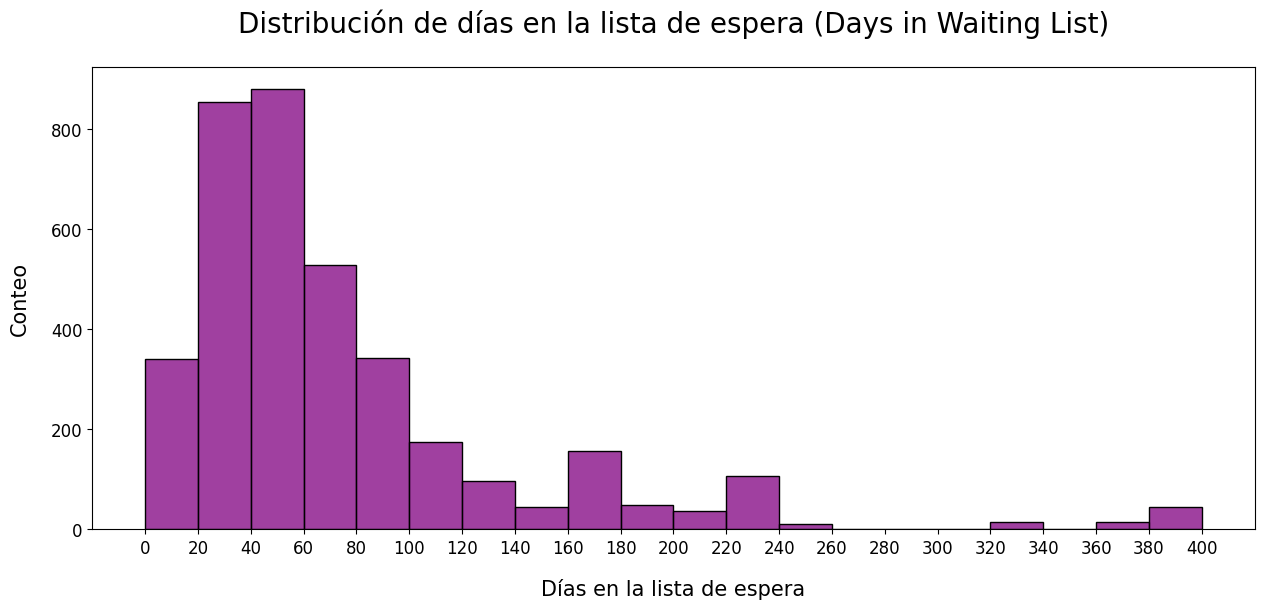

In [36]:
# Histograma para días en lista de espera
data = df[df['days_in_waiting_list'] > 0]['days_in_waiting_list']

bins = np.arange(0, data.max() + 20, 20)

plt.figure(figsize=(15, 6))

sns.histplot(
    data,
    bins=bins,
    color='purple',
    edgecolor='black'

)

plt.title('Distribución de días en la lista de espera (Days in Waiting List)', fontsize=20, pad=25)
plt.xlabel('Días en la lista de espera', fontsize=15, labelpad=15)
plt.ylabel('Conteo', fontsize=15, labelpad=15)

plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Algo similar pasa con previous cancellations y previous bookings not canceled, donde el máximo valor es muy alto pero hasta el tercer cuartil el promedio es de cero. Para esto se realizaron consultas para cada feature y más adelante se realizó un histograma para cada uno con valores mayor a 0 (es decir la minoría de los datos) para asegurarnos de que no se trataba de un error en los datos y solo eran outliers. En este caso identificamos valores atípicos pero que todo indica que pueden ser reales, estos valores se quedaron dentro del dataset final.

In [37]:
# Consulta instancias para cancelaciones previas mayores a 10
df[df['previous_cancellations'] >= 10].sort_values('previous_cancellations', ascending=False)

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
14779,Resort Hotel,275,2015-10-04,41,2,0,2,0,0,HB,...,Offline TA/TO,TA/TO,False,26,0,A,Non Refund,0,Transient,50.00
14793,Resort Hotel,275,2015-10-04,41,2,0,2,0,0,HB,...,Offline TA/TO,TA/TO,False,26,0,A,Non Refund,0,Transient,50.00
14780,Resort Hotel,275,2015-10-04,41,2,0,2,0,0,HB,...,Offline TA/TO,TA/TO,False,26,0,A,Non Refund,0,Transient,50.00
14804,Resort Hotel,275,2015-10-04,41,2,0,2,0,0,HB,...,Offline TA/TO,TA/TO,False,26,0,A,Non Refund,0,Transient,50.00
14803,Resort Hotel,275,2015-10-04,41,2,0,2,0,0,HB,...,Offline TA/TO,TA/TO,False,26,0,A,Non Refund,0,Transient,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80038,City Hotel,1,2016-01-14,3,0,1,1,0,0,BB,...,Online TA,TA/TO,True,11,4,A,No Deposit,0,Transient,67.22
80039,City Hotel,0,2016-01-14,3,0,1,2,0,0,BB,...,Online TA,TA/TO,True,11,4,A,No Deposit,0,Transient,81.90
80040,City Hotel,5,2016-01-14,3,0,2,1,0,0,BB,...,Online TA,TA/TO,True,11,4,A,No Deposit,0,Transient,73.90
80041,City Hotel,4,2016-01-15,3,0,1,2,0,0,SC,...,Online TA,TA/TO,True,11,5,A,No Deposit,0,Transient,77.00


Para el histograma de cancelaciones previas se excluyó el 1 y 0 para visualizar de mejor manera la distribución de los datos, ya que estos últimos constituían la mayoría de las instancias y con el histograma no se podía visualizar de buena manera los demás casos.

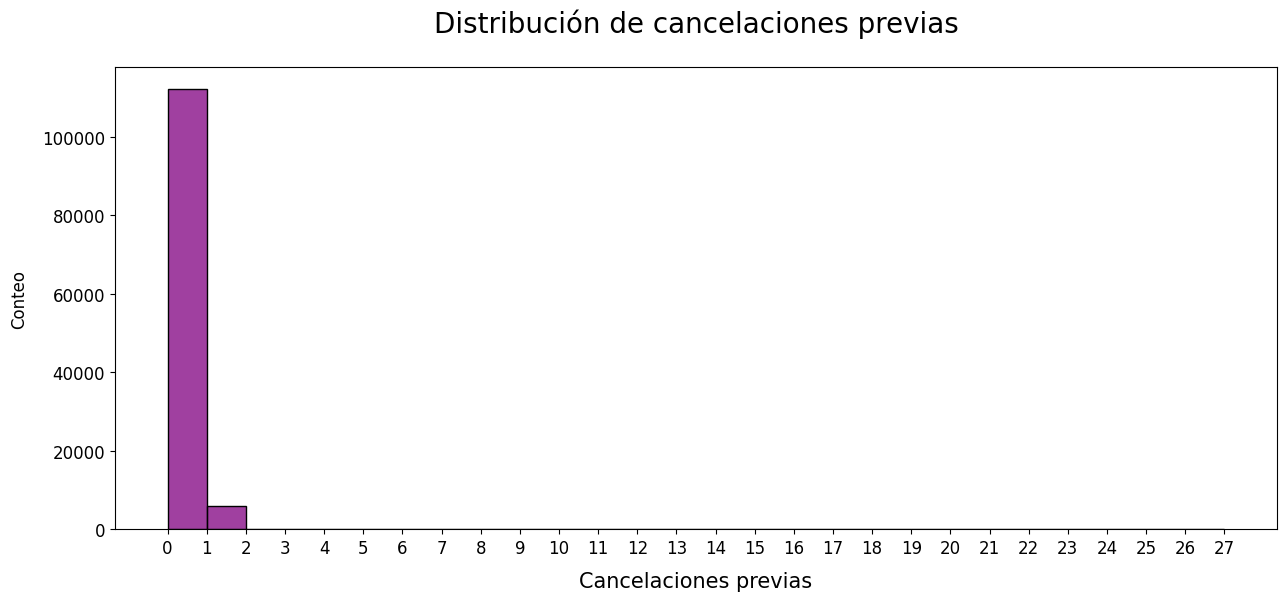

In [38]:
# Histograma para cancelaciones previas (todos los valores)
data = df['previous_cancellations']

bins = np.arange(0, data.max() + 2, 1)

plt.figure(figsize=(15, 6))

sns.histplot(
    data,
    bins=bins,
    color='purple',
    edgecolor='black'
)

plt.title('Distribución de cancelaciones previas', fontsize=20, pad=25)
plt.xlabel('Cancelaciones previas', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)

plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

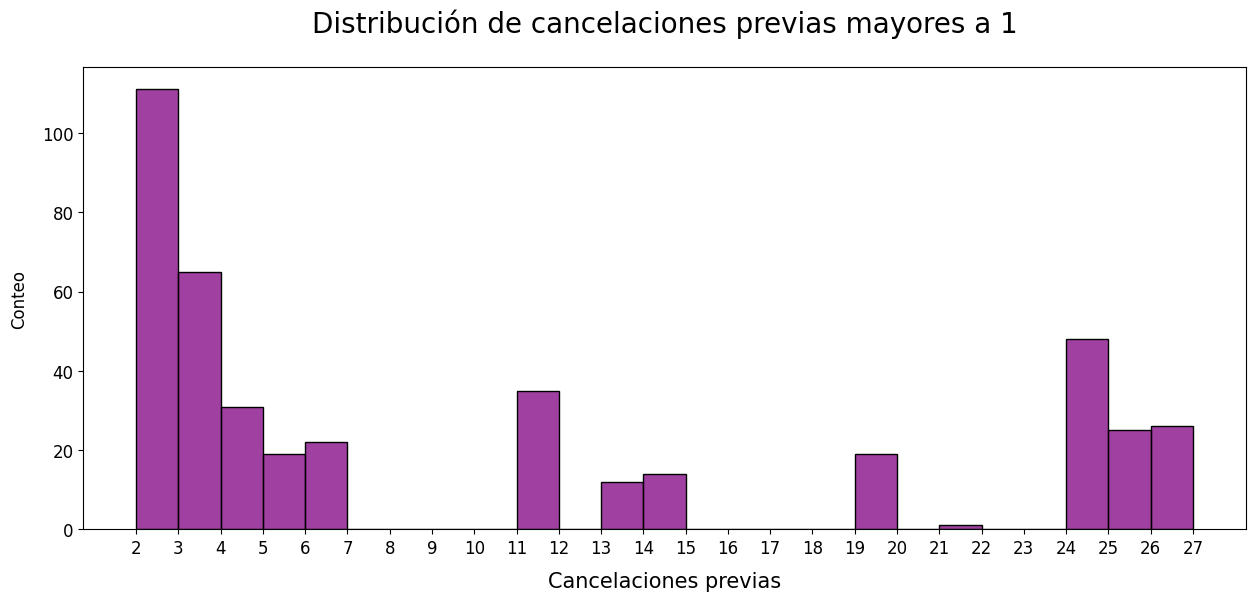

In [39]:
# Histograma para cancelaciones previas mayores a 1
data = df[df['previous_cancellations'] > 1]['previous_cancellations']

bins = np.arange(2, data.max() + 2, 1)

plt.figure(figsize=(15, 6))

sns.histplot(
    data,
    bins=bins,
    color='purple',
    edgecolor='black'
)

plt.title('Distribución de cancelaciones previas mayores a 1', fontsize=20, pad=25)
plt.xlabel('Cancelaciones previas', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)

plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [40]:
# Consulta instancias para resevaciones previas no canceladas mayores a 10
df[df['previous_bookings_not_canceled'] >= 10].sort_values('previous_bookings_not_canceled', ascending=False)

,hotel,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
76731,City Hotel,0,2017-08-22,34,0,1,1,0,0,BB,...,Corporate,Corporate,True,6,72,A,No Deposit,0,Transient,67.0
76730,City Hotel,4,2017-07-23,30,2,1,1,0,0,BB,...,Corporate,Corporate,True,6,71,A,No Deposit,0,Transient,65.0
76729,City Hotel,4,2017-07-16,29,1,0,1,0,0,BB,...,Corporate,Corporate,True,6,70,A,No Deposit,0,Transient,65.0
76728,City Hotel,5,2017-07-11,28,0,2,1,0,0,BB,...,Corporate,Corporate,True,6,69,A,No Deposit,0,Transient,65.0
76727,City Hotel,5,2017-07-04,27,0,3,1,0,0,BB,...,Corporate,Corporate,True,6,68,A,No Deposit,0,Transient,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92951,City Hotel,54,2017-03-26,13,1,0,1,0,0,BB,...,Corporate,Corporate,True,1,10,A,No Deposit,0,Transient,67.0
94227,City Hotel,3,2017-01-23,4,1,0,1,0,0,BB,...,Corporate,Corporate,True,0,10,A,No Deposit,0,Transient,65.0
76665,City Hotel,6,2015-11-17,47,0,2,1,0,0,BB,...,Corporate,Corporate,True,2,10,A,No Deposit,0,Transient,65.0
76639,City Hotel,0,2017-02-07,6,0,1,1,0,0,BB,...,Complementary,Corporate,True,0,10,A,No Deposit,0,Transient,0.0


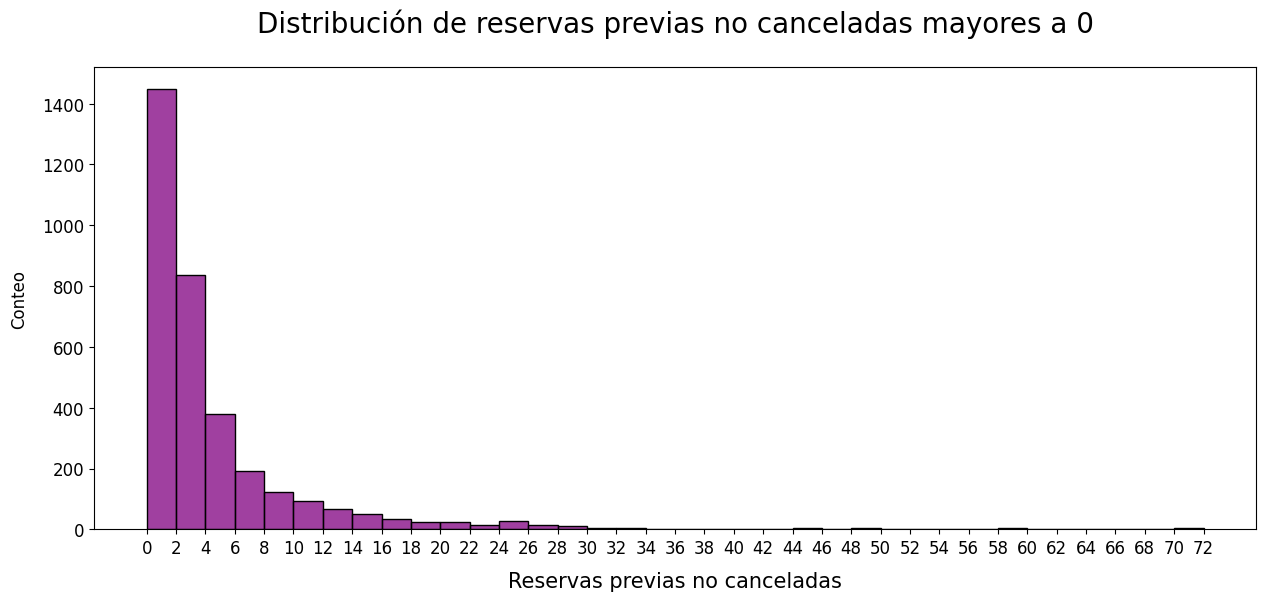

In [41]:
# Histograma para resevaciones previas no canceladas mayores a 0
data = df[df['previous_bookings_not_canceled'] > 0]['previous_bookings_not_canceled']

bins = np.arange(0, data.max() + 2, 2)

plt.figure(figsize=(15, 6))

sns.histplot(
    data,
    bins=bins,
    color='purple',
    edgecolor='black'
)

plt.title('Distribución de reservas previas no canceladas mayores a 0', fontsize=20, pad=25)
plt.xlabel('Reservas previas no canceladas', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)

plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [42]:
# Métricas estadísticas
df.describe(include='number').round(2)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr
count,118500.00,118500.00,118500.00,118500.00,118500.00,118500.00,118500.00,118500.00,118500.00,118500.00,118500.00
mean,104.36,27.17,0.93,2.50,1.86,0.10,0.01,0.09,0.13,2.34,102.13
std,106.93,13.58,0.99,1.89,0.57,0.39,0.09,0.85,1.49,17.65,48.00
min,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,16.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,70.00
50%,69.00,28.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,95.00
75%,161.00,38.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,126.00
max,737.00,53.00,16.00,40.00,55.00,3.00,2.00,26.00,72.00,391.00,510.00


## Gráficas para analizar la relación entre los features

In [43]:
# Lista con el orden de los meses a mostrar en las gráficas
months = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_20185/3076163007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


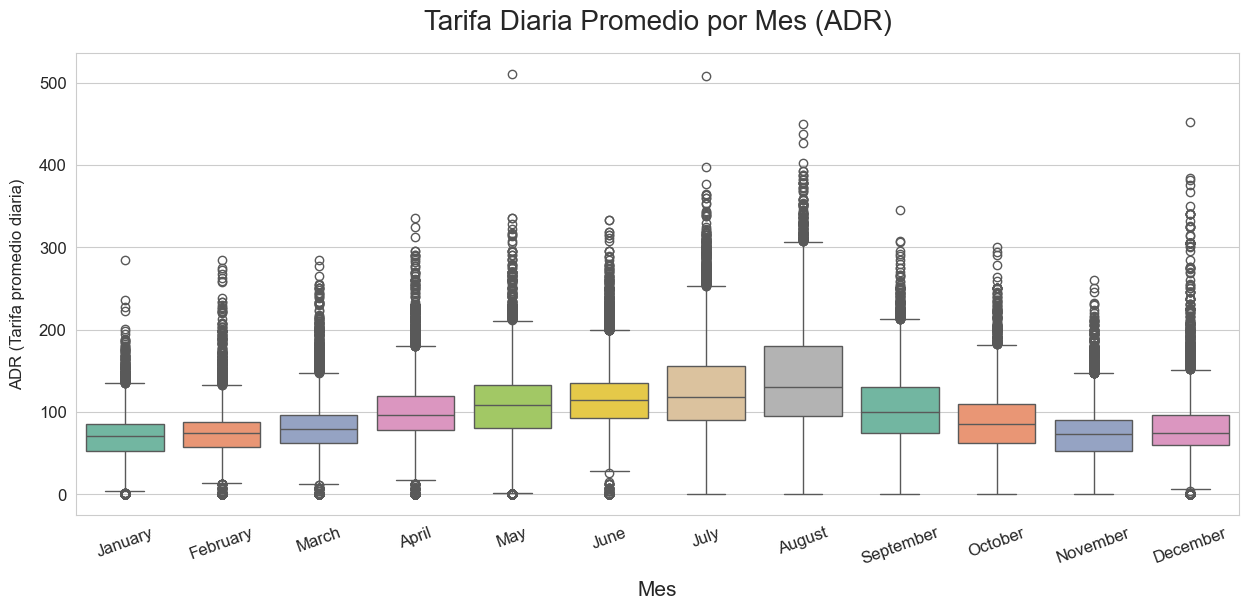

In [44]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

sns.boxplot(
    x=df['arrival_date'].dt.month_name(),
    y=df['adr'],
    order=months,
    palette='Set2'
)

plt.title('Tarifa Diaria Promedio por Mes (ADR)', fontsize=20, pad=17)
plt.xlabel('Mes', fontsize=15, labelpad=10)
plt.ylabel('ADR (Tarifa promedio diaria)', fontsize=12, labelpad=10)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_20185/2661230725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


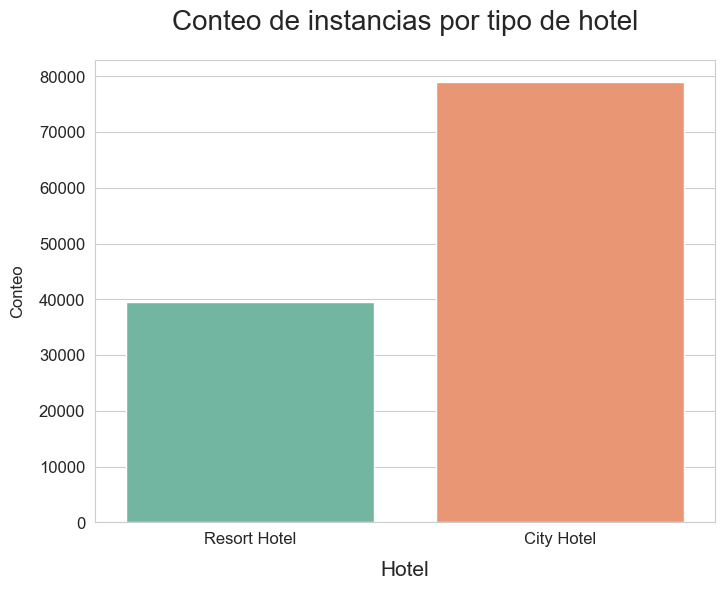

In [45]:
# Gráfica count de tipo de hotel
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.countplot(
    x=df['hotel'],
    palette='Set2'
)

plt.title('Conteo de instancias por tipo de hotel', fontsize=20, pad=22)
plt.xlabel('Hotel', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_20185/2900843237.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


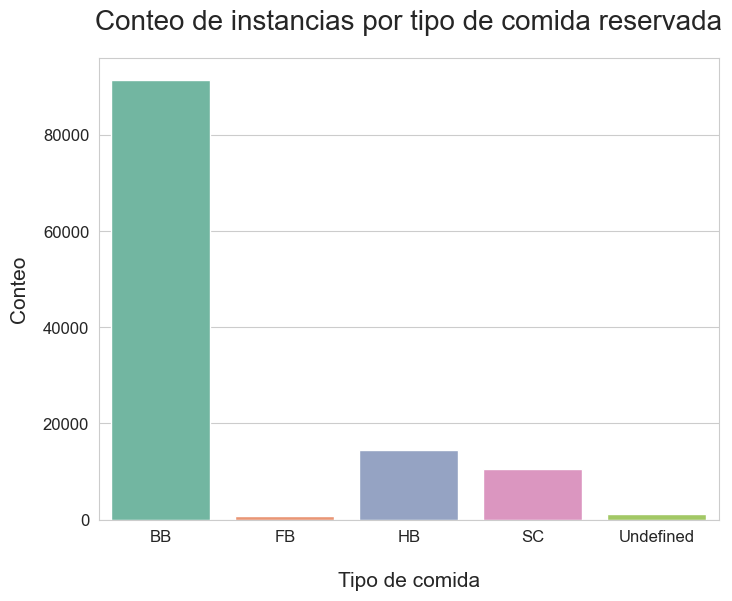

In [46]:
# Gráfica count de tipo de comida reservada
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.countplot(
    x=df['meal'],
    palette='Set2'
)

plt.title('Conteo de instancias por tipo de comida reservada', fontsize=20, pad=20)
plt.xlabel('Tipo de comida', fontsize=15, labelpad=20)
plt.ylabel('Conteo', fontsize=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_20185/2057419463.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


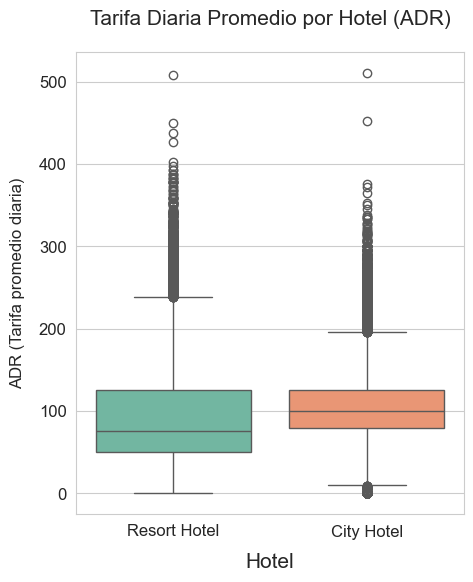

In [47]:
# Gráfica box para tarifa diaria promedio (adr) por tipo de hotel
plt.figure(figsize=(5, 6))
sns.set_style("whitegrid")

sns.boxplot(
    x=df['hotel'],
    y=df['adr'],
    palette='Set2'
)

plt.title('Tarifa Diaria Promedio por Hotel (ADR)', fontsize=15, pad=20)
plt.xlabel('Hotel', fontsize=15, labelpad=10)
plt.ylabel('ADR (Tarifa promedio diaria)', fontsize=12, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

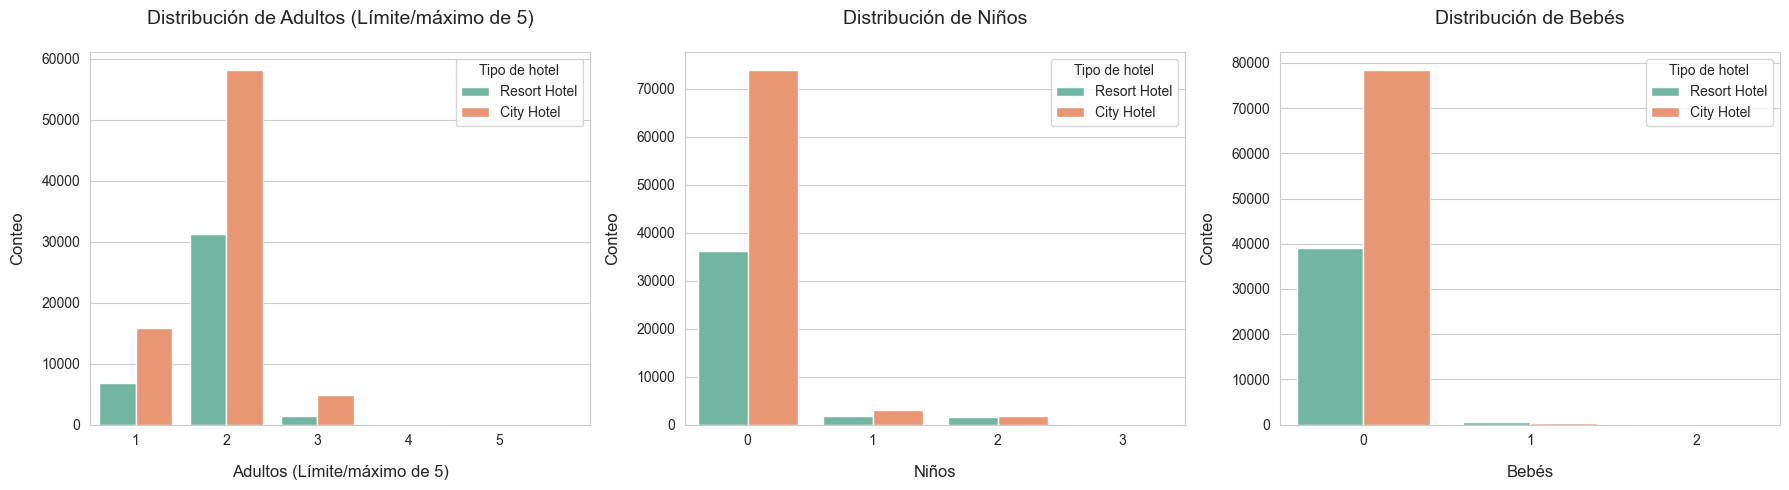

In [48]:
# Gráfica distribución de adultos, niños y bebés con countplot
features = ["adults", "children", "babies"]
titles = {
    "adults": "Adultos (Límite/máximo de 5)",
    "children": "Niños",
    "babies": "Bebés"
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.set_style("whitegrid")

for ax, feature in zip(axes, features):

    # Límite para adultos
    if feature == "adults":
        data = df[df["adults"] <= 5]
        max_val = 5
    else:
        data = df
        max_val = df[feature].max()

    sns.countplot(
        data=data,
        x=feature,
        hue="hotel",
        palette="Set2",
        ax=ax
    )

    ax.set_title(f"Distribución de {titles[feature]}", fontsize=14, pad=20)
    ax.set_xticks(range(0, max_val + 1))
    ax.set_xlabel(titles[feature], fontsize=12, labelpad=12)
    ax.set_ylabel("Conteo", fontsize=12, labelpad=12)

    leg = ax.get_legend()
    leg.set_title("Tipo de hotel")

plt.tight_layout()
plt.show()


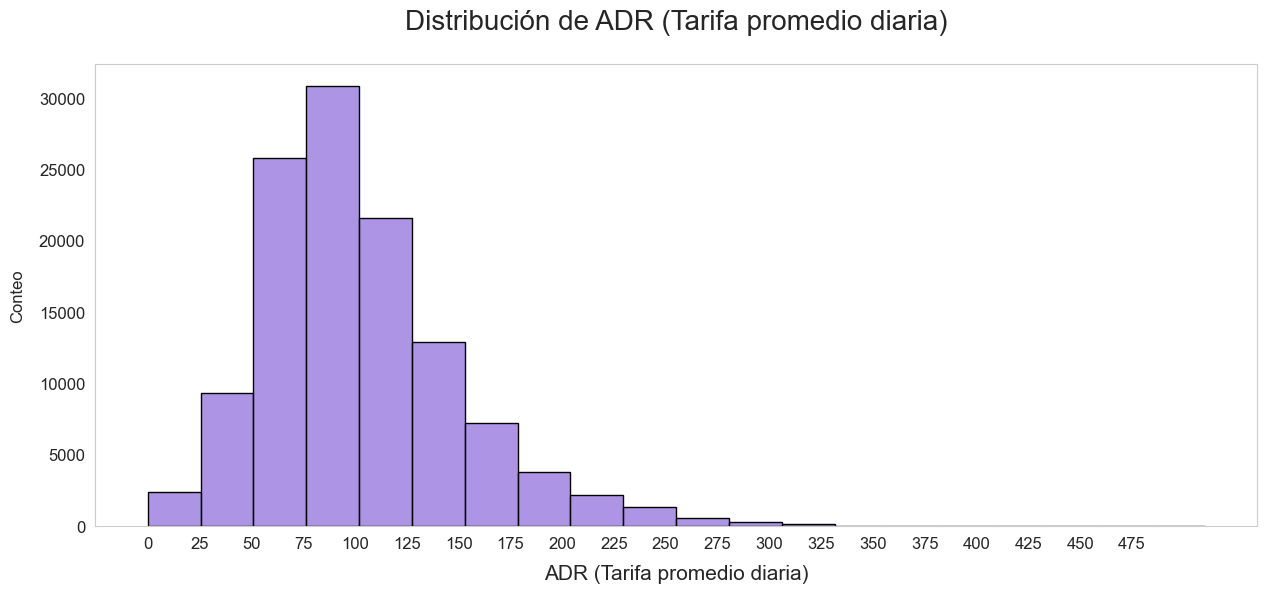

In [49]:
# Histograma ADR
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

sns.histplot(
    data=df,
    x='adr',
    bins=20,
    color="mediumpurple",
    edgecolor='black'
)

plt.title('Distribución de ADR (Tarifa promedio diaria)', fontsize=20, pad=25)
plt.xlabel('ADR (Tarifa promedio diaria)', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)
plt.xticks(range(0, 500, 25), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

plt.show()


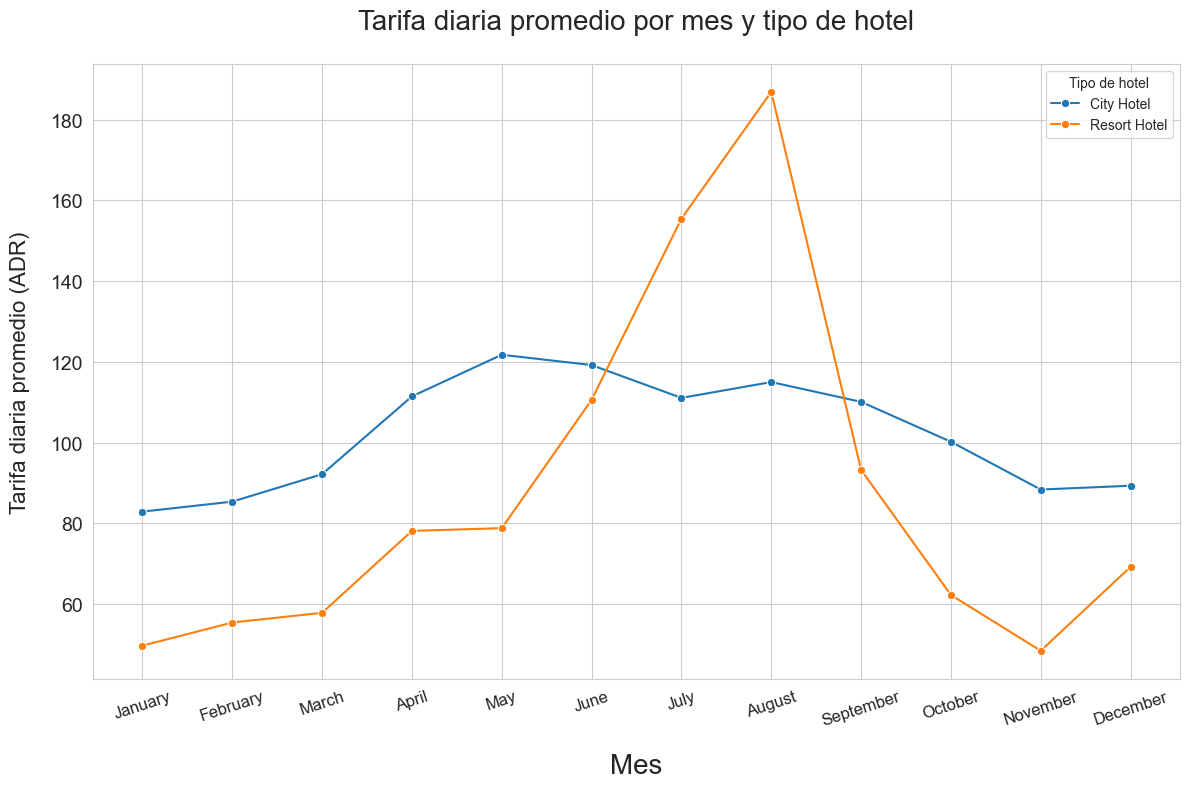

In [50]:
# Preparación de datos
line_data = df.groupby([
    df['arrival_date'].dt.month_name(),
    'hotel'
])['adr'].mean().reset_index()

line_data['month'] = pd.Categorical(
    line_data['arrival_date'],
    categories=months,
    ordered=True
)

line_data = line_data.sort_values('month')

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.lineplot(
    line_data,
    x='month',
    y='adr',
    hue='hotel',
    marker='o',
    ax=ax1
)

ax1.set_title("Tarifa diaria promedio por mes y tipo de hotel", fontsize=20, pad=25)
ax1.set_xlabel("Mes", fontsize=20, labelpad=18)
ax1.set_ylabel("Tarifa diaria promedio (ADR)", fontsize=16, labelpad=15)
ax1.tick_params(axis='x', rotation=18, labelsize=12)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(title="Tipo de hotel")

plt.tight_layout()
plt.show()


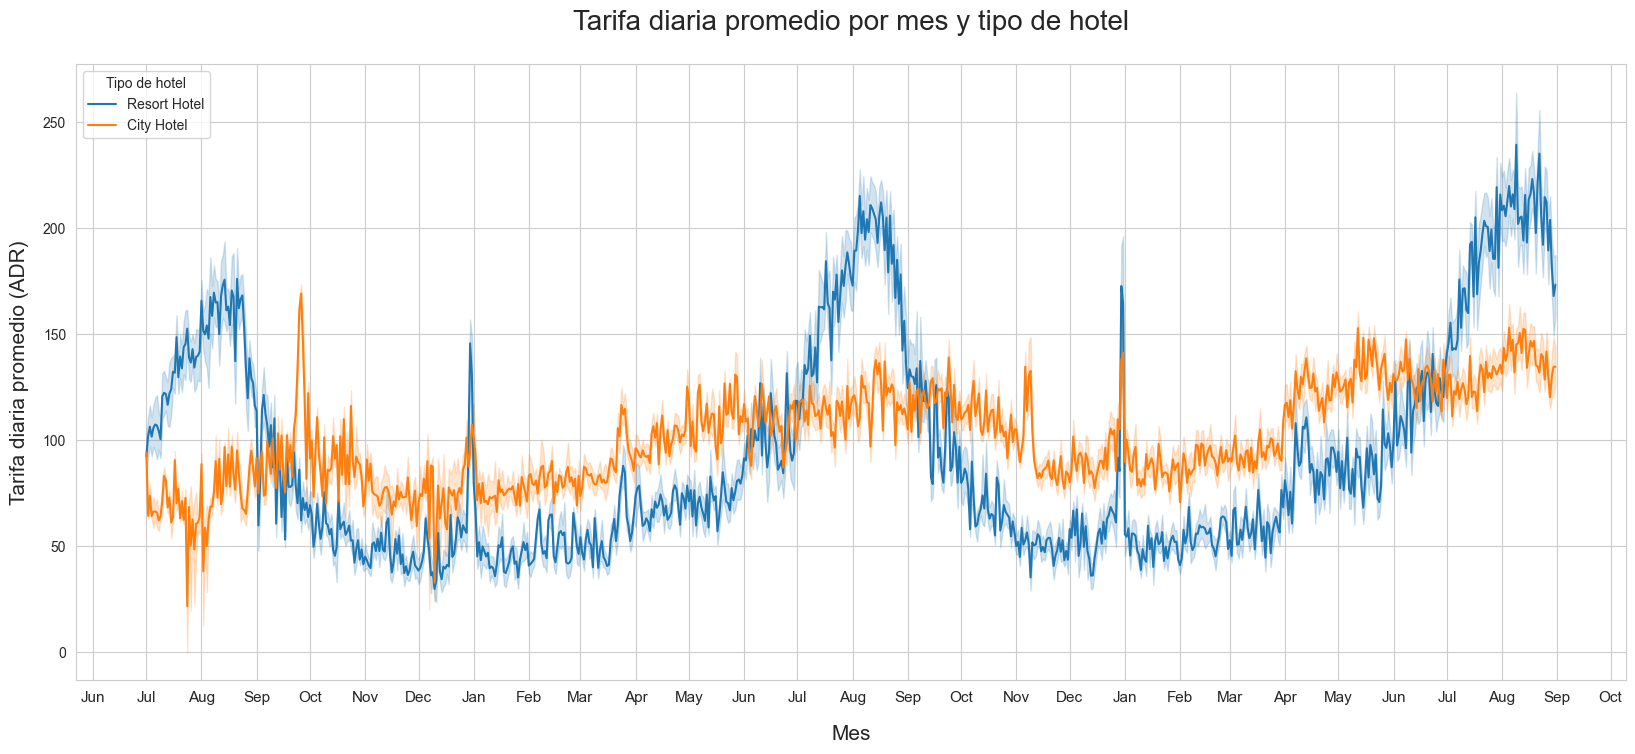

In [51]:
# Timeseries para el adr por tipo de hotel
import matplotlib.dates as mdates

plt.figure(figsize=(20, 8))

sns.lineplot(
    data=df,
    x='arrival_date',
    y='adr',
    hue='hotel',
)

plt.title("Tarifa diaria promedio por mes y tipo de hotel", fontsize=20, pad=25)
plt.xlabel("Mes", fontsize=15, labelpad=15)
plt.ylabel("Tarifa diaria promedio (ADR)", fontsize=15, labelpad=10)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(fontsize=11)
plt.legend(title="Tipo de hotel")

plt.show()

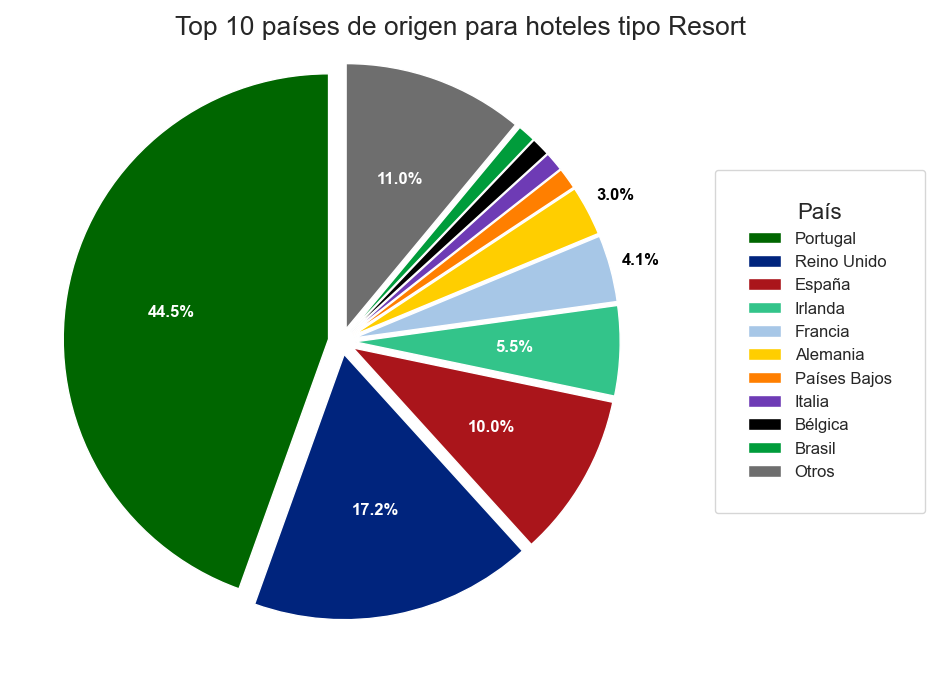

In [52]:
# @title Gráfico de pastel para los 10 principales países de origen para huéspedes de hotel tipo Resort

# Se pasa las abreviaciones a su nombre completo para mostrarlo mejor en la gráfica
iso3_to_name = {
    "PRT": "Portugal",
    "GBR": "Reino Unido",
    "FRA": "Francia",
    "ESP": "España",
    "DEU": "Alemania",
    "ITA": "Italia",
    "IRL": "Irlanda",
    "BEL": "Bélgica",
    "BRA": "Brasil",
    "NLD": "Países Bajos"
}

# Código de color para cada país
country_colors = {
    "PRT": "#006600",
    "GBR": "#00247D",
    "FRA": "#A7C7E7",
    "ESP": "#AA151B",
    "DEU": "#FFCE00",
    "ITA": "#6E3BB5",
    "IRL": "#33C48A",
    "BEL": "#000000",
    "BRA": "#009C3B",
    "NLD": "#FF7F00",
    "OTHERS": "#6E6E6E"
}

df_resort = df[df["hotel"] == "Resort Hotel"]
counts = df_resort["country"].value_counts()

top10 = iso3_to_name.keys()
top10_counts = counts.loc[top10]

# Hace la suma de los países fuera del top 10
others_count = counts.drop(list(top10)).sum()

sorted_top10 = top10_counts.sort_values(ascending=False)

# Agrupa los demás países como otros
final_counts = sorted_top10.copy()
final_counts["OTHERS"] = others_count

labels_full = [iso3_to_name[c] for c in sorted_top10.index] + ["Otros"]
colors = [country_colors[c] for c in sorted_top10.index] + [country_colors["OTHERS"]]

percentages = final_counts / final_counts.sum() * 100

plt.figure(figsize=(12, 7))
explode = [0.05] * len(final_counts)

wedges, texts, autotexts = plt.pie(
    final_counts,
    labels=None,
    colors=colors,
    explode=explode,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=0.6
)

for i, autotext in enumerate(autotexts):
    pct = percentages.iloc[i]
    if pct < 3:
        autotext.set_text("")
    elif pct < 5:
        autotext.set_color("black")
        autotext.set_x(autotext.get_position()[0]*1.8)
        autotext.set_y(autotext.get_position()[1]*1.8)
    else:
        autotext.set_color("white")
    autotext.set_fontsize(12)
    autotext.set_fontweight("bold")

plt.title(
    "Top 10 países de origen para hoteles tipo Resort",
    fontsize=19,
    pad=30,
    x=0.68,
    y=0.90
)

plt.legend(
    labels_full,
    title="País",
    title_fontsize=16,
    fontsize=12,
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    borderpad=2
)

plt.ylabel("")
plt.tight_layout()
plt.show()


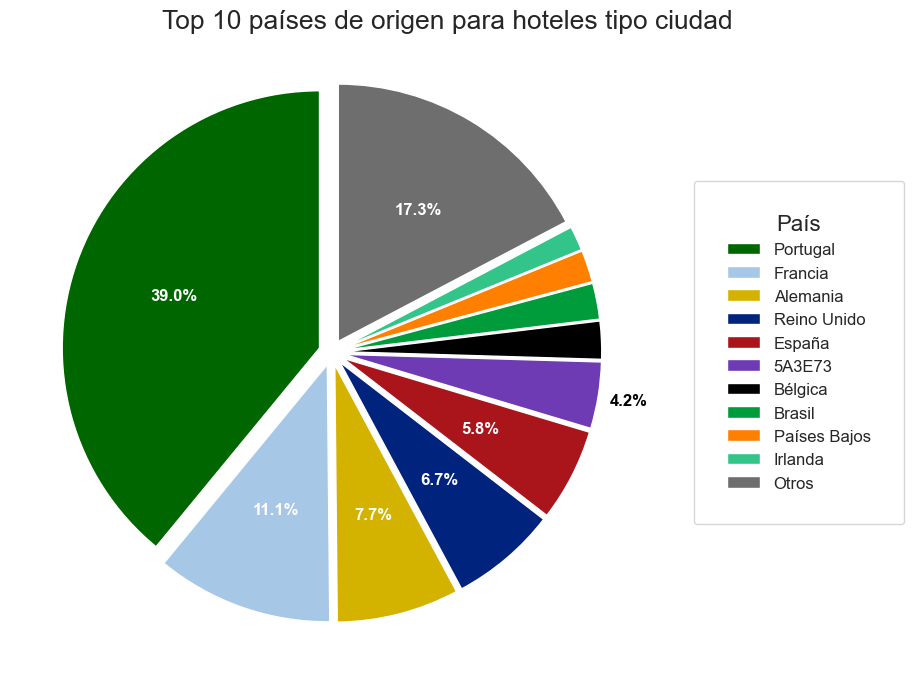

In [53]:
# @title Gráfico de pastel para los 10 principales países de origen para huéspedes de hotel tipo city

# Se pasa las abreviaciones a su nombre completo para mostrarlo mejor en la gráfica
iso3_to_name = {
    "PRT": "Portugal",
    "GBR": "Reino Unido",
    "FRA": "Francia",
    "ESP": "España",
    "DEU": "Alemania",
    "ITA": "5A3E73",
    "IRL": "Irlanda",
    "BEL": "Bélgica",
    "BRA": "Brasil",
    "NLD": "Países Bajos"
}

# Código de color para cada país
country_colors = {
    "PRT": "#006600",
    "GBR": "#00247D",
    "FRA": "#A7C7E7",
    "ESP": "#AA151B",
    "DEU": "#D4B200",
    "ITA": "#6E3BB5",
    "IRL": "#33C48A",
    "BEL": "#000000",
    "BRA": "#009C3B",
    "NLD": "#FF7F00",
    "OTHERS": "#6E6E6E"
}

df_city = df[df["hotel"] == "City Hotel"]
counts = df_city["country"].value_counts()

top10 = iso3_to_name.keys()
top10_counts = counts.loc[top10]

# Hace la suma de los países fuera del top 10
others_count = counts.drop(list(top10)).sum()

sorted_top10 = top10_counts.sort_values(ascending=False)

# Agrupa los demás países como otros
final_counts = sorted_top10.copy()
final_counts["OTHERS"] = others_count

labels_full = [iso3_to_name[c] for c in sorted_top10.index] + ["Otros"]
colors = [country_colors[c] for c in sorted_top10.index] + [country_colors["OTHERS"]]

percentages = final_counts / final_counts.sum() * 100

plt.figure(figsize=(12, 7))
explode = [0.05] * len(final_counts)

wedges, texts, autotexts = plt.pie(
    final_counts,
    labels=None,
    colors=colors,
    explode=explode,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=0.6
)

# Mejor visualización para porcentajes
for i, autotext in enumerate(autotexts):
    pct = percentages.iloc[i]
    if pct < 3:
        autotext.set_text("")
    elif pct < 5:
        autotext.set_color("black")
        autotext.set_x(autotext.get_position()[0]*1.8)
        autotext.set_y(autotext.get_position()[1]*1.8)
    else:
        autotext.set_color("white")
    autotext.set_fontsize(12)
    autotext.set_fontweight("bold")

plt.title(
    "Top 10 países de origen para hoteles tipo ciudad",
    fontsize=19,
    pad=25,
    x=0.68,
    y=0.95
)

plt.legend(
    labels_full,
    title="País",
    title_fontsize=16,
    fontsize=12,
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    borderpad=2
)

plt.ylabel("")
plt.tight_layout()
plt.show()


In [54]:
# Hace la suma de los países fuera del top 10
others_count = counts.drop(list(top10)).sum()

final_counts = top10_counts.copy()
final_counts["OTHERS"] = others_count

# Agrupa los demás países como otros

In [55]:
df.shape

(118500, 21)

In [56]:
df.shape

(118500, 21)

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  root_mean_squared_error, r2_score

# Borramos la variable objetivo y la fecha que no sirve de nada para predecir el futuro con fechas ( aparte ni lo puede leer el modelo asi como va)
df = df.drop(['arrival_date'], axis=1)


# estamos usando dummy el cual ya tiene one hot encoding porque las variables categoricas estan como 
# números con get_dummys de pandas ( convierte todo a 0,1,2 números para que el modelo lo pueda usar)
# no usamos one hot encoding de skelearn porque no lo vimos en la materia.

df_for_model = pd.get_dummies(df, drop_first=True, dtype=int)

# revisamos que este bien 
df_for_model



,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,27,0,0,2,0,0,False,0,0,...,0,0,0,0,0,0,0,0,1,0
1,737,27,0,0,2,0,0,False,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,27,0,1,1,0,0,False,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13,27,0,1,1,0,0,False,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,27,0,2,2,0,0,False,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,2,5,2,0,0,False,0,0,...,0,0,0,0,0,0,0,0,1,0
119386,102,35,2,5,3,0,0,False,0,0,...,1,0,0,0,0,0,0,0,1,0
119387,34,35,2,5,2,0,0,False,0,0,...,0,0,0,0,0,0,0,0,1,0
119388,109,35,2,5,2,0,0,False,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
print(df_for_model.columns)

# revise que si hubiera hecho bien el one hot encoding

Index(['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled',
       ...
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object', length=216)


In [59]:
df_for_model.describe()

# revise que todo estuviera bien sin cosas raras que no se hayan filtrado 

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,...,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000,118500.000000
mean,104.364608,27.166203,0.928160,2.500709,1.864557,0.100650,0.007789,0.087359,0.131840,2.335122,...,0.054684,0.024346,0.017553,0.005072,0.000051,0.122970,0.001367,0.004785,0.750253,0.210616
std,106.931969,13.583907,0.992803,1.889613,0.569539,0.389749,0.089245,0.847216,1.486705,17.649723,...,0.227362,0.154122,0.131319,0.071036,0.007116,0.328405,0.036949,0.069007,0.432868,0.407748
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,161.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,737.000000,53.000000,16.000000,40.000000,55.000000,3.000000,2.000000,26.000000,72.000000,391.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
X = df_for_model.drop(columns='adr', axis=1)

# Variable objetivo 
y = df_for_model['adr']

# Variables predictoras ( borramos arrival_date porque de que nos  sirve esa fecha para un modelo que va predecir a futuro)

# separamos los datos  en 20% de entrenamiento y el 80% para entrenar el modelo 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [61]:
df_for_model.columns

Index(['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled',
       ...
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object', length=216)

In [62]:
model_random_forest = RandomForestRegressor()

model_random_forest.fit(X_train, y_train)

y_pred = model_random_forest.predict(X_test)

# la  razón por la que cambie /opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest → RMSE: {rmse:.2f} | R2: {r2:.3f}")

Random Forest → RMSE: 18.96 | R2: 0.843


In [63]:
# Comparar train vs test
y_pred_train = model_random_forest.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"TRAIN  RMSE: {rmse_train:.2f} | R2: {r2_train:.3f}")
print(f"TEST   RMSE: {rmse:.2f} | R2: {r2:.3f}")


TRAIN  RMSE: 7.82 | R2: 0.973
TEST   RMSE: 18.96 | R2: 0.843


In [64]:
importances = pd.Series(
    model_random_forest.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(10)

# vemos el top 10 de variables mas importantes para que nos de el valor


arrival_date_week_number    0.264622
children                    0.124267
lead_time                   0.090952
adults                      0.080814
hotel_Resort Hotel          0.080763
market_segment_Online TA    0.057152
meal_HB                     0.042506
stays_in_week_nights        0.030259
market_segment_Direct       0.027318
stays_in_weekend_nights     0.019172
dtype: float64

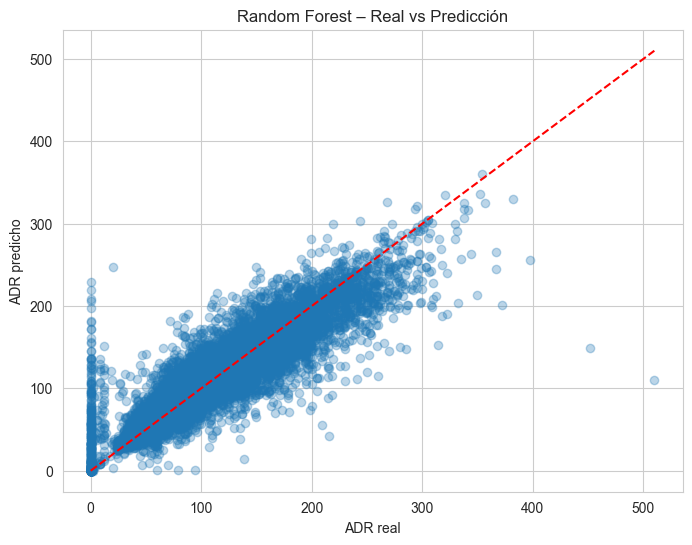

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("ADR real")
plt.ylabel("ADR predicho")
plt.title("Random Forest – Real vs Predicción")
plt.show()


Igual cabe resaltar que en este caso desarrollamos este modelo es de regresión y no clasificación como el de cancelaciones por lo que aquí no se busca que un valor tenga una probabilidad de que este o no en una categoria de la variable objetiva si no aqui mediante los datos de entrenamiento se busca dar un precio medio (ADR) de las variales usadas como contexto del modelo.

Bueno vemos que sale relativamente bien considerando los datos tenemos algunos outliers en 500 con un error muy grande 
o en 0 o 100 pero la mayoria se encuentran con un error esperado.

De igual manera vemos unos outliers en 0 a 100  con un desplazamiento vertical esto puede deberse a un descuento o algo así 
pero como no tenemos forma de verificarlo pues se asume.

Ahora con el R2 y RMSE 

RMSE - nos muestra que 19 unidades de dinero  es el error de el  modelo en promedio despues de mirar la gráfica sabemos que si tenemos algunos outliers. ( osea tendriamos en promedio un error de 19 cada vez que se usa el modelo  lo cual creo que esta bien)
R2  - nos muestra que tenemos un 84% de explicabilidad de los datos 


Igual todo esto mediante un modelo dummy el cual no estoy pasando hiperparametros 

In [66]:
# Ahora vamos a tunear el modelo para ver que tanto lo podemos mejorar 

''' 
RandomForestRegressor
class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2,
 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, 
 bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, 
 max_samples=None, monotonic_cst=None)

valores importantes
Changed in version 0.22: The default value of n_estimators changed from 10 to 100 in 0.22.

criterion{“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}, default=”squared_error”

    The function to measure the quality of a split. Supported criteria are “squared_error” for the mean 
    squared error, which is equal to variance reduction as feature selection criterion and minimizes the
      L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s 
      improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 
      loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits. 
      Training using “absolute_error” is significantly slower than when using “squared_error”.

    Added in version 0.18: Mean Absolute Error (MAE) criterion.

    Added in version 1.0: Poisson criterion.


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html



'''

# hiperparametros de klearn para jugar 

model_random_forest = RandomForestRegressor(
    n_estimators=400,
    max_depth=30,          # menos que 40, pero no ridículo
    min_samples_split=5,   # evita splits con 2 muestras
    min_samples_leaf=2,    # hojas mínimas
    max_features=0.7,      # no todas las features
    random_state=42,
    n_jobs=-1
)

model_random_forest.fit(X_train, y_train)

y_pred = model_random_forest.predict(X_test)

# la  razón por la que cambie /opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 
# 'squared' is deprecated in version 1.4 and will be removed in 1.6. 
# To calculate the root mean squared error, use the function'root_mean_squared_error'.

# sacamos los valores para revisar el modelo con los datos de prueba
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [67]:
# Comparar train vs test

y_pred_train = model_random_forest.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"TRAIN  RMSE: {rmse_train:.2f} | R2: {r2_train:.3f}")
print(f"TEST   RMSE: {rmse:.2f} | R2: {r2:.3f}")


TRAIN  RMSE: 11.90 | R2: 0.939
TEST   RMSE: 18.82 | R2: 0.846


La razón por la que hice esto esra para ver que tanto se estaba adecuando el modelo 
para generalizar, en este caso con estos parametros  que puse mejoro un poco a generalizar 
mejor y no aprenderse los datos tan de memoria con en el primer intento aunque no mejoro
el error si mejoro la generalización y creo que eso esta bien.

osea comparar como el modelo predice con los valores con que se entreno contra los que nunca probo que en este 
caso es el 20% del dataset 

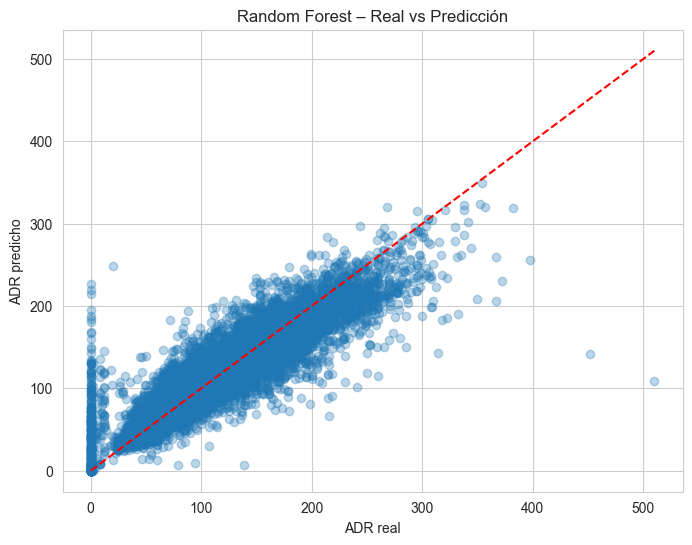

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("ADR real")
plt.ylabel("ADR predicho")
plt.title("Random Forest – Real vs Predicción")
plt.show()

In [69]:
importances = pd.Series(
    model_random_forest.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances


arrival_date_week_number    0.279650
children                    0.118412
lead_time                   0.087669
hotel_Resort Hotel          0.081867
adults                      0.076654
                              ...   
country_LIE                 0.000000
country_LCA                 0.000000
country_LAO                 0.000000
country_ATF                 0.000000
country_KWT                 0.000000
Length: 215, dtype: float64

En conclusión el modelo generaliza de una mejor manera pero sigue teniendo gaps que se necesitan corregir llenando nuestra
base de datos con más valores para que de esta manera pueda aprender si alguno esta en descuento y tal vez asociarla al mes 
para que haga un poco de sentido pero con los datos que tenemos eso no es concluyente.

Por lo tanto las variables explican bastante bien el ADRs pero si tiene un ligero overfitting de que el modelo se aprendio muy de memoria los datos de entrenamiento y le cuesta generalizar pero eso bajo un poco en este intento que ha sido el mejor que me ha salido y teniendo en cuenta que apenas tenemos 116k datos


igual el feature importance sale así debido a que hay más de 215 variables por las categoricas entonces es de esperarse esto aunque esta curioso que sea niños y hora de llegada lo que afecta, al igual que el resort y el numero de adultos